In [1]:
import pandas as pd
import os
import re
import numpy as np
import matplotlib.pylab as plt
import tenseal as ts

In [21]:
base_path = './sensitive_data/machine_data/Erstdaten'

In [22]:
df = pd.DataFrame()
for f in os.listdir(base_path):
    idx = int(re.search("_([0-9]+)\.csv", f).group(1))
    d = pd.read_csv(os.path.join(base_path, f), parse_dates=["TimeStamp"])
    df[idx] = d["FastNc_axis_SP1_AxTorqueAct"]
df = df.reindex(sorted(df.columns), axis=1)

In [23]:
df

,1,2,3,4,5,6,7,8,9,10,...,790,792,793,794,795,796,797,798,799,800
0,-1.57,-2.05,-1.65,-1.71,-1.55,-1.28,-1.51,-1.42,-1.67,-0.42,...,-1.65,-1.28,-0.64,-1.36,-1.57,-0.04,-2.09,-1.57,-0.58,-0.90
1,-1.53,-1.89,-0.78,-0.80,-2.09,-0.20,-1.42,-1.28,-2.85,-0.72,...,-1.24,-1.55,-1.51,-1.30,-1.24,-1.22,-1.49,-2.13,-2.11,-0.60
2,-2.07,-2.13,-1.02,-0.92,-1.40,0.12,-1.12,-2.13,-2.97,-1.16,...,-2.33,-1.22,-1.47,-0.80,-2.05,-1.57,-1.85,-2.91,-1.81,-0.84
3,-2.33,-1.47,-1.79,-1.67,-0.30,-1.36,-2.23,-1.47,-0.34,-2.99,...,-2.99,-2.19,-0.76,-0.64,-2.55,-0.78,-1.63,-1.06,-0.36,-1.36
4,-1.38,-1.79,-1.81,-1.77,0.00,-1.69,-1.40,-0.20,-0.54,-3.40,...,-1.61,-2.91,-0.76,-1.34,-1.53,-0.98,-2.33,-0.36,-0.16,-0.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,-0.88,-3.30,-1.59,-1.63,-2.03,-0.76,-0.88,-1.77,-1.77,-0.54,...,-1.22,-3.01,-1.26,-1.02,-1.02,-1.57,-1.79,-2.07,-1.57,-2.87
324,-1.20,-2.17,-0.84,-0.84,-0.88,-0.94,-1.63,-1.75,-1.63,-1.36,...,-1.67,-1.08,-1.02,-1.59,-1.42,-0.46,-0.98,-2.03,-1.00,-3.14
325,-1.95,-1.89,-1.99,-2.07,-0.98,-1.32,-1.69,-1.08,-0.66,-1.71,...,-1.85,-1.18,-1.53,-1.12,-1.83,-1.63,-1.67,-1.12,-0.84,0.00
326,-0.80,-0.82,-1.34,-1.38,-0.96,-0.38,-1.20,-1.00,-1.69,-0.84,...,-0.66,-1.97,-1.18,-2.45,-0.58,-0.76,-2.07,-2.25,-0.88,-0.90


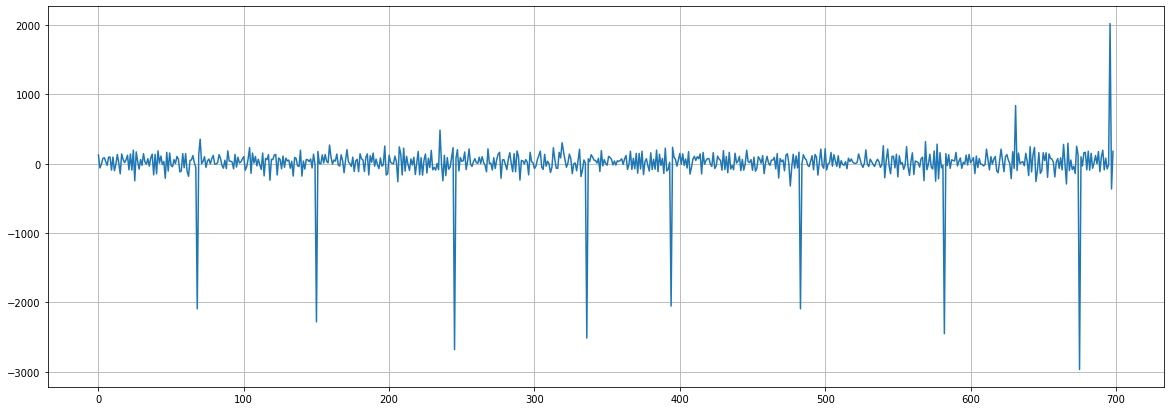

In [24]:
np_df = np.array(df).T
diffs = (np_df[1:,] - np_df[:-1,]).sum(axis=1)
plt.figure(figsize=(20,7))
plt.plot(-diffs)
plt.grid()
plt.show()

In [25]:
data = []
for f in os.listdir(base_path):
    idx = int(re.search("_([0-9]+)\.csv", f).group(1))
    d = pd.read_csv(os.path.join(base_path, f), parse_dates=["TimeStamp"])
    d["bauteil_idx"] = idx
    d.set_index(["bauteil_idx", "TimeStamp"], inplace=True)
    data.append(d)
data = pd.concat(data).sort_index()

In [26]:
data

FastNc_axis_SP1_AxTorqueAct  \
bauteil_idx TimeStamp                                              
1           2021-09-29 15:24:08.878                        -1.57   
            2021-09-29 15:24:08.884                        -1.53   
            2021-09-29 15:24:08.890                        -2.07   
            2021-09-29 15:24:08.896                        -2.33   
            2021-09-29 15:24:08.902                        -1.38   
...                                                          ...   
800         2021-10-13 14:38:48.296                        -2.87   
            2021-10-13 14:38:48.302                        -3.14   
            2021-10-13 14:38:48.308                         0.00   
            2021-10-13 14:38:48.314                        -0.90   
            2021-10-13 14:38:48.320                        -2.31   

                                     FastNc_axis_X_AxTorqueAct  \
bauteil_idx TimeStamp                                            
1           2021-09-29 15:24:08.878                       1.27   
            2021-09-29 15:24:08.884                       1.19   
            2021-09-29 15:24:08.890                       1.12   
            2021-09-29 15:24:08.896                       1.05   
            2021-09-29 15:24:08.902                       0.98   
...                                                        ...   
800         2021-10-13 14:38:48.296                      -0.01   
            2021-10-13 14:38:48.302                      -0.05   
            2021-10-13 14:38:48.308                      -0.01   
            2021-10-13 14:38:48.314                      -0.02   
            2021-10-13 14:38:48.320                      -0.09   

                                     FastNc_axis_Y1_AxTorqueAct  \
bauteil_idx TimeStamp                                             
1           2021-09-29 15:24:08.878                      -22.23   
            2021-09-29 15:24:08.884                      -22.28   
            2021-09-29 15:24:08.890                      -22.32   
            2021-09-29 15:24:08.896                      -22.38   
            2021-09-29 15:24:08.902                      -22.41   
...                                                         ...   
800         2021-10-13 14:38:48.296                      -20.54   
            2021-10-13 14:38:48.302                      -20.50   
            2021-10-13 14:38:48.308                      -20.44   
            2021-10-13 14:38:48.314                      -20.44   
            2021-10-13 14:38:48.320                      -20.40   

                                     FastNc_axis_Z1_AxTorqueAct  
bauteil_idx TimeStamp                                            
1           2021-09-29 15:24:08.878                      -16.84  
            2021-09-29 15:24:08.884                      -13.78  
            2021-09-29 15:24:08.890                       -9.20  
            2021-09-29 15:24:08.896                       -4.53  
            2021-09-29 15:24:08.902                       -1.76  
...                                                         ...  
800         2021-10-13 14:38:48.296                        2.46  
            2021-10-13 14:38:48.302                        2.40  
            2021-10-13 14:38:48.308                        2.34  
            2021-10-13 14:38:48.314                        2.44  
            2021-10-13 14:38:48.320                        2.48  

[229600 rows x 4 columns]

In [27]:
data.reset_index(inplace=True)
data["TimeStamp"] = (
data
    .reset_index()
    .TimeStamp 
- 
data
    .reset_index()
    .groupby("bauteil_idx")
    ["TimeStamp"]
    .transform(min)
)
data.set_index(["bauteil_idx", "TimeStamp"], inplace=True)

In [28]:
data.groupby("bauteil_idx")

In [29]:
data.reset_index().pivot(index="bauteil_idx", columns="TimeStamp", values="FastNc_axis_SP1_AxTorqueAct")

TimeStamp,0 days 00:00:00,0 days 00:00:00.004000,0 days 00:00:00.006000,0 days 00:00:00.008000,0 days 00:00:00.010000,0 days 00:00:00.012000,0 days 00:00:00.014000,0 days 00:00:00.016000,0 days 00:00:00.018000,0 days 00:00:00.020000,...,0 days 00:00:01.946000,0 days 00:00:01.948000,0 days 00:00:01.950000,0 days 00:00:01.952000,0 days 00:00:01.954000,0 days 00:00:01.956000,0 days 00:00:01.958000,0 days 00:00:01.960000,0 days 00:00:01.962000,0 days 00:00:01.964000
bauteil_idx,,,,,,,,,,,,,,,,,,,,,
1,-1.57,NaN,-1.53,NaN,NaN,-2.07,NaN,NaN,-2.33,NaN,...,NaN,NaN,-1.95,NaN,NaN,-0.80,NaN,NaN,-0.92,NaN
2,-2.05,NaN,-1.89,NaN,NaN,-2.13,NaN,NaN,-1.47,NaN,...,NaN,NaN,-1.89,NaN,NaN,-0.82,NaN,NaN,-1.53,NaN
3,-1.65,NaN,-0.78,NaN,NaN,-1.02,NaN,NaN,-1.79,NaN,...,NaN,NaN,-1.99,NaN,NaN,-1.34,NaN,NaN,-2.15,NaN
4,-1.71,NaN,-0.80,NaN,NaN,-0.92,NaN,NaN,-1.67,NaN,...,NaN,NaN,-2.07,NaN,NaN,-1.38,NaN,NaN,-2.19,NaN
5,-1.55,NaN,-2.09,NaN,NaN,-1.40,NaN,NaN,-0.30,NaN,...,NaN,NaN,-0.98,NaN,NaN,-0.96,NaN,NaN,-1.40,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,-0.04,NaN,-1.22,NaN,NaN,-1.57,NaN,NaN,-0.78,NaN,...,NaN,NaN,-1.63,NaN,NaN,-0.76,NaN,NaN,-2.19,NaN
797,-2.09,NaN,-1.49,NaN,NaN,-1.85,NaN,NaN,-1.63,NaN,...,NaN,NaN,-1.67,NaN,NaN,-2.07,NaN,NaN,-0.74,NaN
798,-1.57,NaN,-2.13,NaN,NaN,-2.91,NaN,NaN,-1.06,NaN,...,NaN,NaN,-1.12,NaN,NaN,-2.25,NaN,NaN,-2.57,NaN


In [30]:
resampled_data = (data
    .reset_index(level=[0,1])
    .groupby("bauteil_idx")
    .resample("30ms", on="TimeStamp").mean()
    .drop(columns="bauteil_idx")
    .reset_index()
    .set_index(["bauteil_idx", "TimeStamp"])
)
resampled_data

FastNc_axis_SP1_AxTorqueAct  \
bauteil_idx TimeStamp                                             
1           0 days 00:00:00                              -1.776   
            0 days 00:00:00.030000                       -0.880   
            0 days 00:00:00.060000                       -1.158   
            0 days 00:00:00.090000                       -1.554   
            0 days 00:00:00.120000                       -1.466   
...                                                         ...   
800         0 days 00:00:01.830000                       -6.560   
            0 days 00:00:01.860000                       -2.980   
            0 days 00:00:01.890000                       -2.690   
            0 days 00:00:01.920000                       -2.046   
            0 days 00:00:01.950000                       -1.070   

                                    FastNc_axis_X_AxTorqueAct  \
bauteil_idx TimeStamp                                           
1           0 days 00:00:00                             1.122   
            0 days 00:00:00.030000                      1.094   
            0 days 00:00:00.060000                      1.610   
            0 days 00:00:00.090000                      1.050   
            0 days 00:00:00.120000                      0.844   
...                                                       ...   
800         0 days 00:00:01.830000                      0.408   
            0 days 00:00:01.860000                      0.104   
            0 days 00:00:01.890000                      0.126   
            0 days 00:00:01.920000                      0.044   
            0 days 00:00:01.950000                     -0.040   

                                    FastNc_axis_Y1_AxTorqueAct  \
bauteil_idx TimeStamp                                            
1           0 days 00:00:00                         -22.324000   
            0 days 00:00:00.030000                  -22.534000   
            0 days 00:00:00.060000                  -22.576000   
            0 days 00:00:00.090000                  -22.714000   
            0 days 00:00:00.120000                  -22.900000   
...                                                        ...   
800         0 days 00:00:01.830000                  -20.914000   
            0 days 00:00:01.860000                  -20.818000   
            0 days 00:00:01.890000                  -20.576000   
            0 days 00:00:01.920000                  -20.478000   
            0 days 00:00:01.950000                  -20.426667   

                                    FastNc_axis_Z1_AxTorqueAct  
bauteil_idx TimeStamp                                           
1           0 days 00:00:00                             -9.222  
            0 days 00:00:00.030000                       1.408  
            0 days 00:00:00.060000                       2.370  
            0 days 00:00:00.090000                       2.212  
            0 days 00:00:00.120000                       2.556  
...                                                        ...  
800         0 days 00:00:01.830000                       2.688  
            0 days 00:00:01.860000                       2.498  
            0 days 00:00:01.890000                       2.490  
            0 days 00:00:01.920000                       2.460  
            0 days 00:00:01.950000                       2.420  

[46200 rows x 4 columns]

In [31]:
spindle = resampled_data.reset_index().pivot(index="bauteil_idx", columns="TimeStamp", values="FastNc_axis_SP1_AxTorqueAct")
spindle

TimeStamp,0 days 00:00:00,0 days 00:00:00.030000,0 days 00:00:00.060000,0 days 00:00:00.090000,0 days 00:00:00.120000,0 days 00:00:00.150000,0 days 00:00:00.180000,0 days 00:00:00.210000,0 days 00:00:00.240000,0 days 00:00:00.270000,...,0 days 00:00:01.680000,0 days 00:00:01.710000,0 days 00:00:01.740000,0 days 00:00:01.770000,0 days 00:00:01.800000,0 days 00:00:01.830000,0 days 00:00:01.860000,0 days 00:00:01.890000,0 days 00:00:01.920000,0 days 00:00:01.950000
bauteil_idx,,,,,,,,,,,,,,,,,,,,,
1,-1.776,-0.880,-1.158,-1.554,-1.466,-1.656,-1.066,-2.172,-2.562,-5.052,...,-20.090,-15.236,-10.310,-8.072,-5.922,-3.464,-1.584,-1.778,-2.136,-1.223333
2,-1.866,-1.232,-1.312,-1.364,-1.242,-2.036,-1.412,-0.962,-4.944,-5.670,...,-19.906,-15.520,-11.744,-8.250,-5.810,-4.770,-1.954,-1.518,-2.126,-1.413333
3,-1.410,-1.180,-1.612,-2.076,-0.788,-1.378,-2.418,-0.680,-3.966,-5.276,...,-19.612,-14.572,-11.670,-8.564,-4.168,-2.956,-2.404,-1.520,-1.116,-1.826667
4,-1.374,-1.200,-1.604,-2.096,-0.832,-1.346,-2.454,-0.724,-2.956,-5.002,...,-20.842,-15.260,-12.228,-9.524,-5.156,-3.964,-3.126,-1.860,-1.210,-1.880000
5,-1.068,-1.280,-1.414,-1.286,-2.052,-1.186,-0.948,-2.534,-2.564,-6.790,...,-20.390,-15.496,-10.496,-8.328,-6.492,-2.454,-1.560,-2.272,-1.374,-1.113333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,-0.918,-1.378,-1.516,-1.546,-1.448,-0.852,-2.284,-1.180,-2.442,-6.408,...,-23.088,-16.914,-12.544,-9.792,-5.936,-2.904,-2.652,-2.002,-1.046,-1.526667
797,-1.878,-0.880,-1.120,-1.388,-1.838,-1.616,-0.792,-1.904,-3.154,-5.232,...,-22.892,-16.986,-13.196,-9.342,-6.322,-4.150,-1.914,-2.084,-2.410,-1.493333
798,-1.606,-1.818,-0.972,-1.404,-1.342,-0.854,-1.650,-1.932,-4.372,-8.726,...,-34.242,-30.360,-24.028,-18.610,-12.468,-6.018,-3.462,-3.062,-1.734,-1.980000


In [32]:
np_spindle   = np.array(spindle)
np_spindle_T = np_spindle.T

print(np_spindle)

[[-1.776      -0.88       -1.158      ... -1.778      -2.136
  -1.22333333]
 [-1.866      -1.232      -1.312      ... -1.518      -2.126
  -1.41333333]
 [-1.41       -1.18       -1.612      ... -1.52       -1.116
  -1.82666667]
 ...
 [-1.606      -1.818      -0.972      ... -3.062      -1.734
  -1.98      ]
 [-1.004      -0.972      -1.4        ... -2.018      -1.434
  -0.93333333]
 [-0.828      -2.284      -1.016      ... -2.69       -2.046
  -1.07      ]]


In [33]:
# TenSEAL context
bits_scale = 25
    
# Create TenSEAL context
context = ts.context(
    ts.SCHEME_TYPE.CKKS,
    poly_modulus_degree=4096,
    coeff_mod_bit_sizes=[39, bits_scale, 39]
)

context.global_scale = pow(2, bits_scale)
context.generate_galois_keys()

In [34]:
spindle_enc = []
for v in np_spindle:
    v_enc = ts.ckks_vector(context, v)
    spindle_enc.append(v_enc)

In [35]:
deltas = [(spindle_enc[i+1] - spindle_enc[i]).sum() for i in range(len(spindle_enc)-1)]

In [36]:
result = [x.decrypt() for x in deltas]

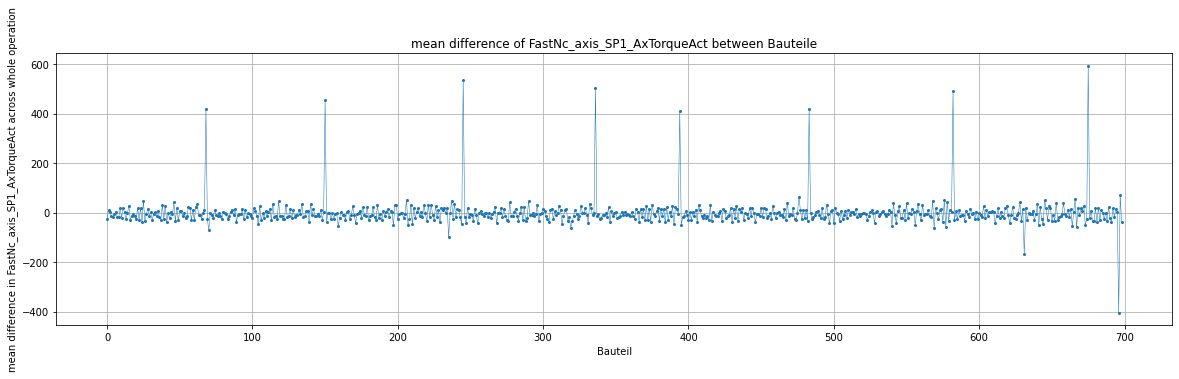

In [37]:
plt.figure(figsize=(20,5))
plt.title("mean difference of FastNc_axis_SP1_AxTorqueAct between Bauteile")
plt.xlabel("Bauteil")
plt.ylabel("mean difference in FastNc_axis_SP1_AxTorqueAct across whole operation")
plt.grid()
#plt.axhline(2, color="red", linestyle=":")
plt.plot(result, "o-", markersize=2, linewidth=0.5)
plt.show()